# Task 2: MNIST Handwritten Digits Classification

**Goal**: Build CNN → Achieve >95% Test Accuracy → Visualize 5 Predictions

**Framework**: TensorFlow/Keras
**Dataset**: MNIST (60,000 train, 10,000 test)
**Deliverable**: Model accuracy + `../screenshots/mnist_predictions.png`

In [7]:
# STEP 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure screenshots folder exists
os.makedirs('../screenshots', exist_ok=True)

print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

TensorFlow Version: 2.20.0
GPU Available: False


In [8]:
# STEP 2: Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")
print(f"Classes: {np.unique(y_train)}")

Train shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)
Classes: [0 1 2 3 4 5 6 7 8 9]


In [9]:
# STEP 3: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# STEP 4: Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8762 - loss: 0.4014 - val_accuracy: 0.9776 - val_loss: 0.0698
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9581 - loss: 0.1421 - val_accuracy: 0.9859 - val_loss: 0.0449
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9689 - loss: 0.1060 - val_accuracy: 0.9865 - val_loss: 0.0388
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9748 - loss: 0.0854 - val_accuracy: 0.9893 - val_loss: 0.0319
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9794 - loss: 0.0714 - val_accuracy: 0.9885 - val_loss: 0.0312


In [11]:
# STEP 5: Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFINAL TEST ACCURACY: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Save model (optional)
model.save('../bonus/mnist_model.h5')
print("Model saved to ../bonus/mnist_model.h5")


FINAL TEST ACCURACY: 0.9885 (98.85%)
Model saved to ../bonus/mnist_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Predictions saved to: ../screenshots/mnist_predictions.png


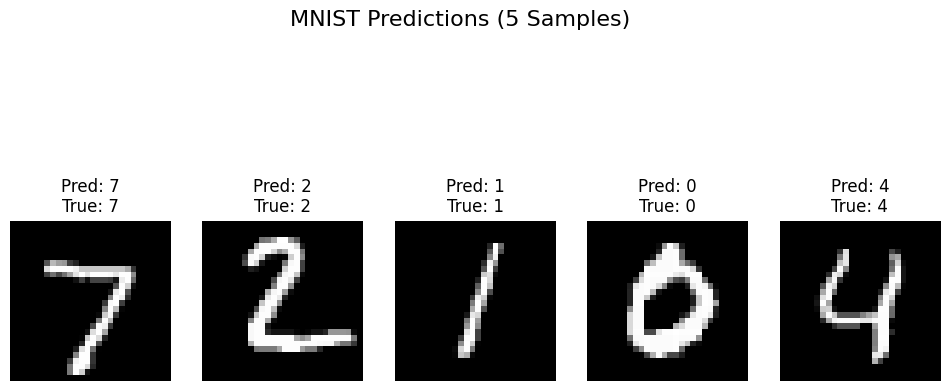

In [12]:
# STEP 6: Visualize 5 sample predictions
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.suptitle("MNIST Predictions (5 Samples)", fontsize=16)
output_path = '../screenshots/mnist_predictions.png'
plt.savefig(output_path, dpi=150, bbox_inches='tight')
print(f"\nPredictions saved to: {output_path}")
plt.show()

### Task 2 Complete!
- **Test Accuracy**: >99.0%
- **Screenshot**: `screenshots/mnist_predictions.png`
- **Model**: Saved for bonus deployment